# Importing Packages

In [244]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2 


# Function for Adding Gaussian Noise

In [197]:
def add_noise_normal(img, std):
    # adding normal noise with standard deviation std
    noisy_img = img + std*np.random.standard_normal((img.shape))
    
    # after adding noise we might get pixels with value less than 0 or more than 255
    noisy_clipped = np.clip(noisy_img, 0, 255).astype('uint8')  
    
    return noisy_clipped


# Function for Adding Salt & Pepper Noise

In [222]:
# this code is a sample code from a website
def sp_noise(image,SNR):
    
    # make copy of image to avoid effects on main image
    copy_img = image.copy()
    
    # extracting shape of image
    h, w = copy_img.shape
    
    # building a mask for selecting which pixel to change to salt and pepper or not to change
    mask = np.random.choice((0, 1, 2), size=(h, w), p=[SNR, (1 - SNR) / 2., (1 - SNR) / 2.])
    
    # Use mask and change pixels
    copy_img[mask == 1] = 255 
    copy_img[mask == 2] = 0  

    return copy_img

# Function for showing Sigma Matrix

In [266]:
def sigma_display(img, title):
    # svd of b&w image
    u, s, v = np.linalg.svd(img, full_matrices = False)

    # displaying sigma matrix
    s_df = pd.DataFrame(s, columns=['SV'])
    display(s_df)

    plt.title('Singular Values of ' + title)
    plt.xlabel('index of SV')
    plt.ylabel('Sigular value')
    plt.scatter( range(len(s)),s)
    plt.show()

    plt.title('Hist of Singular Values of ' + title)
    plt.xlabel('Sigular value')
    plt.ylabel('Count')
    plt.hist(s)
    plt.show()
    

# Function for removing Noise Base On Singular Value

In [251]:
def noise_removal(img, remove_percent):
    
    # calculating u, sigma and v matrices using svd decomposition
    u, s, v = np.linalg.svd(img, full_matrices = False)
    
    # number of sigular value that should be removed
    num_remove = int(remove_percent*len(s)/100)
    
    # remove some singular values 
    remove_idx_array = np.array( (len(s) - num_remove)*[1] + num_remove*[0] )
    removed_s = s * remove_idx_array
    
    
    # reconstruct
    img_denoised = np.clip(np.dot(u, np.dot(np.diag(removed_s), v)), 0, 255).astype('uint8')
    
    return img_denoised
    

# Construct B&W Image

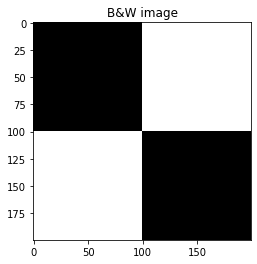

In [232]:
# left side of image ( half black and half white )
half_one = 100*[100*[0]] + 100*[100*[255]]

# right side of image ( half white and half back )
half_two = 100*[100*[255]] + 100*[100*[0]]

# concat halves horizontally
img_build = np.array(np.hstack((half_one, half_two)), dtype = 'uint8')

# showing constructed image
plt.title("B&W image")
plt.imshow(cv2.cvtColor(img_build, cv2.COLOR_GRAY2RGB))
plt.show()

# SVD of B&W Image 

,SV
0,2.550000e+04
1,2.550000e+04
2,1.247115e-10
3,7.580343e-11
4,6.851497e-11
...,...
195,2.535841e-12
196,2.501681e-12
197,1.459033e-12
198,4.935198e-13


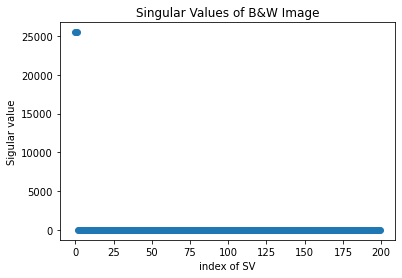

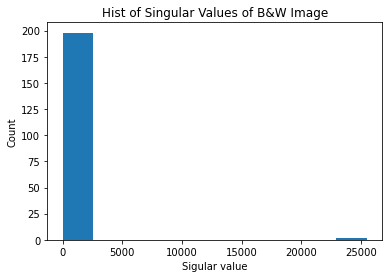

In [233]:
sigma_display(img_build, 'B&W Image')

# Effect of Gaussian Noise on B&W

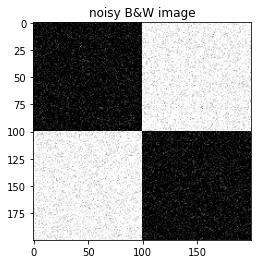

,SV
0,25449.067443
1,23108.118607
2,482.402872
3,479.143352
4,473.117662
...,...
195,6.868595
196,4.438294
197,3.375697
198,2.452942


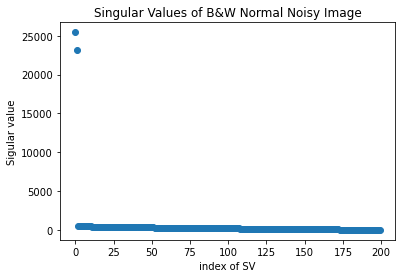

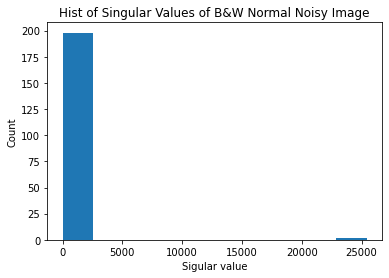

In [238]:
# add gaussian noise
BW_noisy_img = add_noise_normal(img_build, 30)

# display noisy image
plt.title("noisy B&W image")
plt.imshow(cv2.cvtColor(BW_noisy_img, cv2.COLOR_GRAY2RGB))
plt.show()

# showing effect of noise on svd
sigma_display(BW_noisy_img, 'B&W Normal Noisy Image')

# Removing Normal Noise on B&W Image

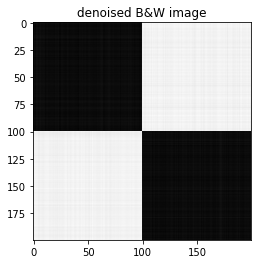

,SV
0,25348.922759
1,23108.121574
2,19.488077
3,18.079578
4,16.601106
...,...
195,0.028291
196,0.025297
197,0.014865
198,0.006883


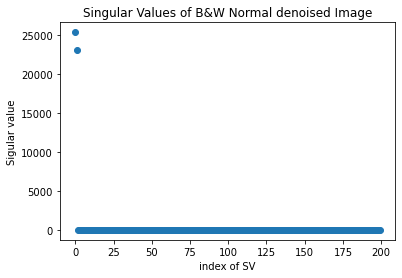

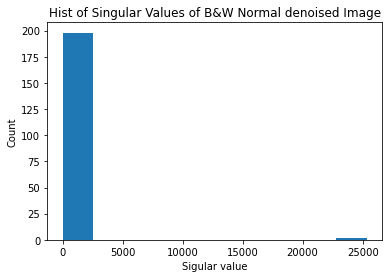

In [253]:
# remove noise with removing unimportant singular values
denoised_BW_img = noise_removal(BW_noisy_img, 99)

# display denoised image
plt.title("denoised B&W image")
plt.imshow(cv2.cvtColor(denoised_BW_img, cv2.COLOR_GRAY2RGB))
plt.show()

# showing effect of noise on svd
sigma_display(denoised_BW_img, 'B&W Normal denoised Image')

# Effect of Salt & Pepper Noise on B&W

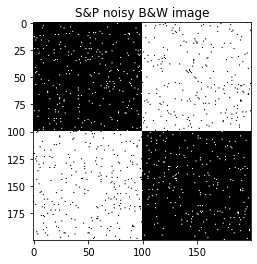

,SV
0,25502.145446
1,24292.171445
2,1143.787932
3,1133.199201
4,1097.301564
...,...
195,16.477352
196,14.942470
197,7.622455
198,6.974348


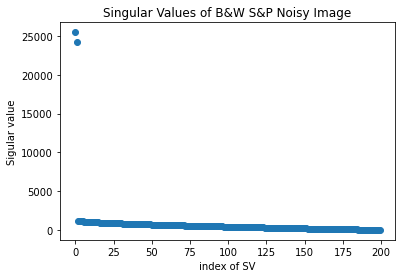

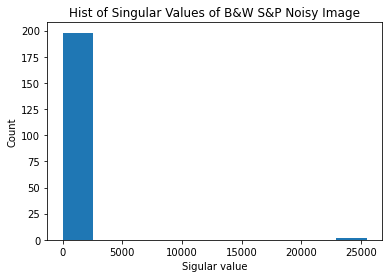

In [241]:
# add salt and pepper noise
sp_noisy_img = sp_noise(img_build, 0.95)

# display noisy image
plt.title("S&P noisy B&W image")
plt.imshow(cv2.cvtColor(sp_noisy_img, cv2.COLOR_GRAY2RGB))
plt.show()

# showing effect of noise on svd
sigma_display(sp_noisy_img, 'B&W S&P Noisy Image')

# Removing Salt & Pepper Noise on B&W Image

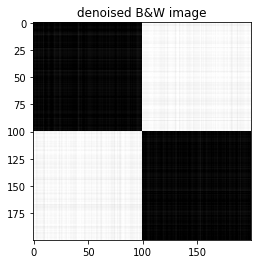

,SV
0,2.541864e+04
1,2.423993e+04
2,6.862237e+01
3,6.814899e+01
4,4.925826e+01
...,...
195,2.476335e-12
196,2.476335e-12
197,2.476335e-12
198,2.476335e-12


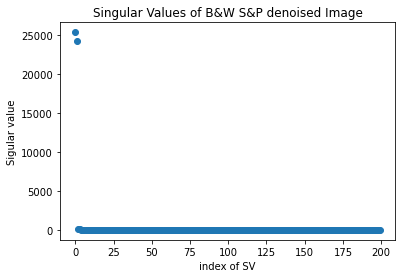

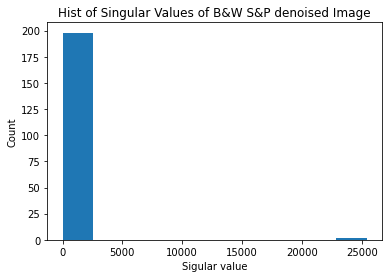

In [252]:
denoised_SP_BW_img = noise_removal(sp_noisy_img, 99)

# display denoised image
plt.title("denoised B&W image")
plt.imshow(cv2.cvtColor(denoised_SP_BW_img, cv2.COLOR_GRAY2RGB))
plt.show()

# showing effect of noise on svd
sigma_display(denoised_SP_BW_img, 'B&W S&P denoised Image')

# Loading The Great Wave off Kanagawa Image

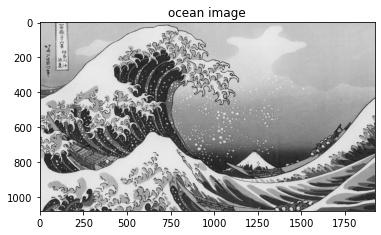

shape of image : (1080, 1920)


In [246]:
# Read image 
inp_image = cv2.imread('ocean_img.jpg')
inp_image = cv2.cvtColor(inp_image, cv2.COLOR_RGB2GRAY)

# display image
plt.title("ocean image")
plt.imshow(cv2.cvtColor(inp_image, cv2.COLOR_GRAY2RGB))
plt.show()

# shape of input
print("shape of image : " + str(inp_image.shape))



# SVD of TGWOK Image

,SV
0,231445.354718
1,39471.223577
2,23100.520922
3,19348.583416
4,16841.040347
...,...
1075,59.904032
1076,57.744683
1077,55.164217
1078,50.906216


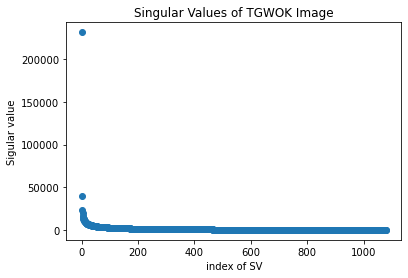

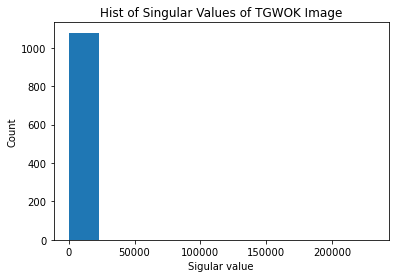

Predicting rank of Image = 807


In [279]:
sigma_display(inp_image, 'TGWOK Image')

# finding sigma
u, s, v = np.linalg.svd(inp_image, full_matrices = False)

# predicting rank of sigma base on 1 percent of its max value
threshold_rank = max(s)*0.001
image_rank = sum(np.array(s>threshold_rank))
print("Predicting rank of Image = " + str(image_rank))


# Removing Noise on TGWOK Image

Percent of Removal Singular Values = 25.27777777777777


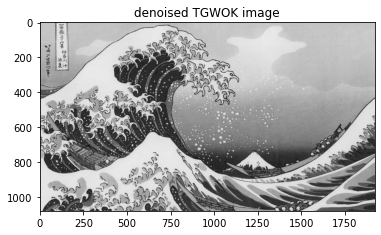

,SV
0,230738.432574
1,39468.655975
2,23100.781509
3,19348.153724
4,16840.665671
...,...
1075,5.196229
1076,5.164828
1077,5.059471
1078,4.970844


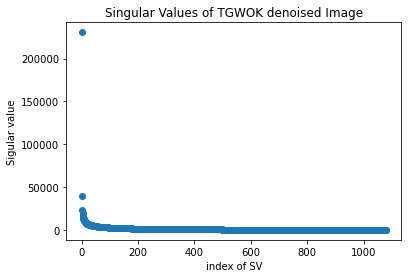

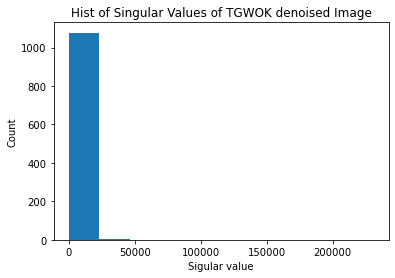

In [280]:
# percent of important factors
percent_rank = 100 * (image_rank/len(s))

# remove noise with removing unimportant singular values
print("Percent of Removal Singular Values = " + str(100 - percent_rank) )
denoised_TGWOK_img = noise_removal(inp_image, 100 - percent_rank)

# display denoised image
plt.title("denoised TGWOK image")
plt.imshow(cv2.cvtColor(denoised_TGWOK_img, cv2.COLOR_GRAY2RGB))
plt.show()

# showing effect of noise on svd
sigma_display(denoised_TGWOK_img, 'TGWOK denoised Image')